## Data Preprocessing

In [337]:
import numpy as np
import pandas as pd

In [338]:
# Power load dataset
load_dataset = pd.read_csv("data/load_data_clean.csv")
# Meterological dataset
met_dataset = pd.read_csv("data/met_data_clean.csv")

In [339]:
load_df = pd.DataFrame(load_dataset)
met_df = pd.DataFrame(met_dataset)

In [340]:
load_df["DATE (MM/DD/YYYY)"] = pd.to_datetime(
    load_df["DATE (MM/DD/YYYY)"], format="%m/%d/%Y"
)

met_df["DATE (MM/DD/YYYY)"] = pd.to_datetime(
    met_df["DATE (MM/DD/YYYY)"], format="%m/%d/%Y"
)

In [341]:
load_df.head()

,DATE (MM/DD/YYYY),KW,KWS,CHWTON,HTmmBTU,Combined mmBTU,Combined Tons Carbon,KW#Houses,KWlightbulbs,KWgalsgas,...,CHWTONlightbulbs,CHWTONgalsgas,HTmmBTU#Houses,HTmmBTUlightbulbs,HTmmBTUgalsgas,Total#Houses,Totallightbulbs,Totalgalsgas,GHG,DOW
0,2024-05-01,351973.45,39367.64,117009.06,115.27,2720.37,497.21,100564,25140971,9608,...,29385656,11233,9652,2412510,922,227789,56939137,969870,169.754,4
1,2024-05-02,353826.38,39144.04,119220.71,115.03,2752.99,503.17,101093,25273323,9658,...,29941089,11445,9632,2407457,920,230520,57621868,987740,170.867,5
2,2024-05-03,357657.88,38935.34,123171.43,109.79,2808.22,513.27,102188,25547001,9763,...,30933274,11824,9193,2297666,878,235145,58777940,1019713,173.062,6
3,2024-05-04,363958.25,38676.54,118279.24,108.33,2769.56,506.20,103988,25997028,9935,...,29704649,11355,9071,2267263,867,231908,57968940,981181,176.630,7
4,2024-05-05,320144.95,33341.16,106070.52,108.39,2473.62,452.11,91470,22867506,8739,...,26638552,10183,9076,2268428,867,207127,51774485,879305,155.741,1


Here is an explanation of each data column of load dataset:

1. **DATE (MM/DD/YYYY):**
   - **Description:** The date in the format Month/Day/Year.
   - **Example:** `05/01/2024` represents May 1, 2024.

2. **KW:**
   - **Description:** The total kilowatt (KW) power consumption for the day.
   - **Example:** `351973.45` KW represents the total power consumption on the given day.

3. **KWS:**
   - **Description:** The total power consumption in kilowatt-hours (KWH).
   - **Example:** `39367.64` KWS represents the total power consumption in KWH.

4. **CHWTON:**
   - **Description:** The total cooling energy consumption in cooling tons.
   - **Example:** `117009.06` CHWTON represents the cooling energy consumption.

5. **HTmmBTU:**
   - **Description:** The total heating energy consumption in million British thermal units (mmBTU).
   - **Example:** `115.27` HTmmBTU represents the heating energy consumption.

6. **Combined mmBTU:**
   - **Description:** The combined energy consumption (cooling and heating) in million British thermal units (mmBTU).
   - **Example:** `2720.37` Combined mmBTU represents the combined energy consumption.

7. **Combined Tons Carbon:**
   - **Description:** The combined carbon emissions in tons.
   - **Example:** `497.21` Combined Tons Carbon represents the total carbon emissions.

8. **KW#Houses:**
   - **Description:** The equivalent number of houses that the KW consumption can power.
   - **Example:** `100564` houses can be powered by the KW consumption.

9. **KWlightbulbs:**
   - **Description:** The equivalent number of lightbulbs that the KW consumption can power.
   - **Example:** `25140971` lightbulbs can be powered by the KW consumption.

10. **KWgalsgas:**
    - **Description:** The equivalent number of gallons of gasoline that the KW consumption can power.
    - **Example:** `9608` gallons of gasoline can be powered by the KW consumption.

11. **CHWTON#Houses:**
    - **Description:** The equivalent number of houses that the cooling energy (CHWTON) consumption can power.
    - **Example:** `117572` houses can be powered by the cooling energy consumption.

12. **CHWTONlightbulbs:**
    - **Description:** The equivalent number of lightbulbs that the cooling energy (CHWTON) consumption can power.
    - **Example:** `29385656` lightbulbs can be powered by the cooling energy consumption.

13. **CHWTONgalsgas:**
    - **Description:** The equivalent number of gallons of gasoline that the cooling energy (CHWTON) consumption can power.
    - **Example:** `11233` gallons of gasoline can be powered by the cooling energy consumption.

14. **HTmmBTU#Houses:**
    - **Description:** The equivalent number of houses that the heating energy (HTmmBTU) consumption can power.
    - **Example:** `9652` houses can be powered by the heating energy consumption.

15. **HTmmBTUlightbulbs:**
    - **Description:** The equivalent number of lightbulbs that the heating energy (HTmmBTU) consumption can power.
    - **Example:** `2412510` lightbulbs can be powered by the heating energy consumption.

16. **HTmmBTUgalsgas:**
    - **Description:** The equivalent number of gallons of gasoline that the heating energy (HTmmBTU) consumption can power.
    - **Example:** `922` gallons of gasoline can be powered by the heating energy consumption.

17. **Total#Houses:**
    - **Description:** The total equivalent number of houses that the combined energy consumption can power.
    - **Example:** `227789` houses can be powered by the combined energy consumption.

18. **Totallightbulbs:**
    - **Description:** The total equivalent number of lightbulbs that the combined energy consumption can power.
    - **Example:** `56939137` lightbulbs can be powered by the combined energy consumption.

19. **Totalgalsgas:**
    - **Description:** The total equivalent number of gallons of gasoline that the combined energy consumption can power.
    - **Example:** `969870` gallons of gasoline can be powered by the combined energy consumption.

20. **GHG:**
    - **Description:** Greenhouse gas emissions.
    - **Example:** `169.754` represents the greenhouse gas emissions.

21. **DOW:**
    - **Description:** Day of the week, where 1 represents Monday, 2 represents Tuesday, etc.
    - **Example:** `4` represents Thursday.

In [342]:
met_df.head()

,DATE (MM/DD/YYYY),AVG Air Temperature [deg F],MAX Air Temperature [deg F],MIN Air Temperature [deg F],AVG Rel Humidity [%],MAX Rel Humidity [%],MIN Rel Humidity [%],AVG Avg Wind Speed @ 3m [MPH],MAX Avg Wind Speed @ 3m [MPH],MIN Avg Wind Speed @ 3m [MPH],AVG Peak Wind Speed @ 3m [MPH],MAX Peak Wind Speed @ 3m [MPH],MIN Peak Wind Speed @ 3m [MPH],AVG Station Pressure [inHg],MAX Station Pressure [inHg],MIN Station Pressure [inHg]
0,2024-05-01,76.2268,87.494,61.322,19.3349,34.09,8.040,7.5972,24.4721,0.0,11.1715,30.6460,0.0,27.2098,27.2561,27.1436
1,2024-05-02,76.1305,89.690,60.836,18.6194,36.39,6.938,5.1366,22.8839,0.0,8.0311,27.2906,0.0,27.2407,27.2873,27.1868
2,2024-05-03,77.3261,89.960,63.878,19.7970,41.99,6.877,5.7147,23.8457,0.0,8.8923,39.0345,0.0,27.2277,27.2663,27.1653
3,2024-05-04,76.8995,89.762,61.106,17.8820,31.30,6.234,5.5733,20.5574,0.0,8.6903,25.6129,0.0,27.2277,27.2670,27.1798
4,2024-05-05,75.1771,86.774,63.176,18.5651,30.04,9.040,11.2813,32.4132,0.0,16.0872,44.0676,0.0,27.2212,27.2677,27.1493


Here is an explanation of each column in the meteorological dataset:

1. **DATE (MM/DD/YYYY):**
   - **Description:** The date in the format Month/Day/Year.
   - **Example:** `05/01/2024` represents May 1, 2024.

2. **AVG Air Temperature [deg F]:**
   - **Description:** The average air temperature in degrees Fahrenheit for the day.
   - **Example:** `76.2268` degrees Fahrenheit.

3. **MAX Air Temperature [deg F]:**
   - **Description:** The maximum air temperature in degrees Fahrenheit for the day.
   - **Example:** `87.494` degrees Fahrenheit.

4. **MIN Air Temperature [deg F]:**
   - **Description:** The minimum air temperature in degrees Fahrenheit for the day.
   - **Example:** `61.322` degrees Fahrenheit.

5. **AVG Rel Humidity [%]:**
   - **Description:** The average relative humidity as a percentage for the day.
   - **Example:** `19.3349%`.

6. **MAX Rel Humidity [%]:**
   - **Description:** The maximum relative humidity as a percentage for the day.
   - **Example:** `34.09%`.

7. **MIN Rel Humidity [%]:**
   - **Description:** The minimum relative humidity as a percentage for the day.
   - **Example:** `8.04%`.

8. **AVG Avg Wind Speed @ 3m [MPH]:**
   - **Description:** The average wind speed at 3 meters above ground level in miles per hour for the day.
   - **Example:** `7.5972` miles per hour.

9. **MAX Avg Wind Speed @ 3m [MPH]:**
   - **Description:** The maximum average wind speed at 3 meters above ground level in miles per hour for the day.
   - **Example:** `24.4721` miles per hour.

10. **MIN Avg Wind Speed @ 3m [MPH]:**
    - **Description:** The minimum average wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `0.0` miles per hour.

11. **AVG Peak Wind Speed @ 3m [MPH]:**
    - **Description:** The average peak wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `11.1715` miles per hour.

12. **MAX Peak Wind Speed @ 3m [MPH]:**
    - **Description:** The maximum peak wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `30.646` miles per hour.

13. **MIN Peak Wind Speed @ 3m [MPH]:**
    - **Description:** The minimum peak wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `0.0` miles per hour.

14. **AVG Station Pressure [inHg]:**
    - **Description:** The average station pressure in inches of mercury for the day.
    - **Example:** `27.2098` inches of mercury.

15. **MAX Station Pressure [inHg]:**
    - **Description:** The maximum station pressure in inches of mercury for the day.
    - **Example:** `27.2561` inches of mercury.

16. **MIN Station Pressure [inHg]:**
    - **Description:** The minimum station pressure in inches of mercury for the day.
    - **Example:** `27.1436` inches of mercury.

These columns represent various meteorological measurements that can influence power load and consumption patterns. By incorporating this data into our analysis, we can build models that account for the impact of weather conditions on power usage.

In [343]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE (MM/DD/YYYY)     61 non-null     datetime64[ns]
 1   KW                    61 non-null     float64       
 2   KWS                   61 non-null     float64       
 3   CHWTON                61 non-null     float64       
 4   HTmmBTU               61 non-null     float64       
 5   Combined mmBTU        61 non-null     float64       
 6   Combined Tons Carbon  61 non-null     float64       
 7   KW#Houses             61 non-null     int64         
 8   KWlightbulbs          61 non-null     int64         
 9   KWgalsgas             61 non-null     int64         
 10  CHWTON#Houses         61 non-null     int64         
 11  CHWTONlightbulbs      61 non-null     int64         
 12  CHWTONgalsgas         61 non-null     int64         
 13  HTmmBTU#Houses        

In [344]:
met_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE (MM/DD/YYYY)               61 non-null     datetime64[ns]
 1   AVG Air Temperature [deg F]     61 non-null     float64       
 2   MAX Air Temperature [deg F]     61 non-null     float64       
 3   MIN Air Temperature [deg F]     61 non-null     float64       
 4   AVG Rel Humidity [%]            61 non-null     float64       
 5   MAX Rel Humidity [%]            61 non-null     float64       
 6   MIN Rel Humidity [%]            61 non-null     float64       
 7   AVG Avg Wind Speed @ 3m [MPH]   61 non-null     float64       
 8   MAX Avg Wind Speed @ 3m [MPH]   61 non-null     float64       
 9   MIN Avg Wind Speed @ 3m [MPH]   61 non-null     float64       
 10  AVG Peak Wind Speed @ 3m [MPH]  61 non-null     float64       
 11  MAX Peak

In [345]:
merged_df = pd.merge(load_df, met_df, on="DATE (MM/DD/YYYY)", how="inner")

In [346]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE (MM/DD/YYYY)               61 non-null     datetime64[ns]
 1   KW                              61 non-null     float64       
 2   KWS                             61 non-null     float64       
 3   CHWTON                          61 non-null     float64       
 4   HTmmBTU                         61 non-null     float64       
 5   Combined mmBTU                  61 non-null     float64       
 6   Combined Tons Carbon            61 non-null     float64       
 7   KW#Houses                       61 non-null     int64         
 8   KWlightbulbs                    61 non-null     int64         
 9   KWgalsgas                       61 non-null     int64         
 10  CHWTON#Houses                   61 non-null     int64         
 11  CHWTONli

In [347]:
merged_df.head()

,DATE (MM/DD/YYYY),KW,KWS,CHWTON,HTmmBTU,Combined mmBTU,Combined Tons Carbon,KW#Houses,KWlightbulbs,KWgalsgas,...,MIN Rel Humidity [%],AVG Avg Wind Speed @ 3m [MPH],MAX Avg Wind Speed @ 3m [MPH],MIN Avg Wind Speed @ 3m [MPH],AVG Peak Wind Speed @ 3m [MPH],MAX Peak Wind Speed @ 3m [MPH],MIN Peak Wind Speed @ 3m [MPH],AVG Station Pressure [inHg],MAX Station Pressure [inHg],MIN Station Pressure [inHg]
0,2024-05-01,351973.45,39367.64,117009.06,115.27,2720.37,497.21,100564,25140971,9608,...,8.040,7.5972,24.4721,0.0,11.1715,30.6460,0.0,27.2098,27.2561,27.1436
1,2024-05-02,353826.38,39144.04,119220.71,115.03,2752.99,503.17,101093,25273323,9658,...,6.938,5.1366,22.8839,0.0,8.0311,27.2906,0.0,27.2407,27.2873,27.1868
2,2024-05-03,357657.88,38935.34,123171.43,109.79,2808.22,513.27,102188,25547001,9763,...,6.877,5.7147,23.8457,0.0,8.8923,39.0345,0.0,27.2277,27.2663,27.1653
3,2024-05-04,363958.25,38676.54,118279.24,108.33,2769.56,506.20,103988,25997028,9935,...,6.234,5.5733,20.5574,0.0,8.6903,25.6129,0.0,27.2277,27.2670,27.1798
4,2024-05-05,320144.95,33341.16,106070.52,108.39,2473.62,452.11,91470,22867506,8739,...,9.040,11.2813,32.4132,0.0,16.0872,44.0676,0.0,27.2212,27.2677,27.1493


In [348]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE (MM/DD/YYYY)               61 non-null     datetime64[ns]
 1   KW                              61 non-null     float64       
 2   KWS                             61 non-null     float64       
 3   CHWTON                          61 non-null     float64       
 4   HTmmBTU                         61 non-null     float64       
 5   Combined mmBTU                  61 non-null     float64       
 6   Combined Tons Carbon            61 non-null     float64       
 7   KW#Houses                       61 non-null     int64         
 8   KWlightbulbs                    61 non-null     int64         
 9   KWgalsgas                       61 non-null     int64         
 10  CHWTON#Houses                   61 non-null     int64         
 11  CHWTONli

In [349]:
corr_matrix = merged_df.corr()
print(corr_matrix["KW"].sort_values(ascending=False))

KW                                1.000000
KWlightbulbs                      1.000000
KW#Houses                         1.000000
KWgalsgas                         1.000000
GHG                               0.986451
Combined Tons Carbon              0.746549
Totallightbulbs                   0.746546
Total#Houses                      0.746521
Combined mmBTU                    0.746521
Totalgalsgas                      0.627526
CHWTON#Houses                     0.621073
CHWTONlightbulbs                  0.621072
CHWTON                            0.621072
CHWTONgalsgas                     0.621071
MIN Air Temperature [deg F]       0.491314
MAX Air Temperature [deg F]       0.456301
AVG Air Temperature [deg F]       0.446496
DATE (MM/DD/YYYY)                 0.429802
AVG Rel Humidity [%]              0.419901
MAX Rel Humidity [%]              0.408729
MIN Rel Humidity [%]              0.377083
MIN Avg Wind Speed @ 3m [MPH]     0.280278
MIN Peak Wind Speed @ 3m [MPH]    0.280278
DOW        

## Data Preprocessing

In [350]:
from sklearn.preprocessing import MinMaxScaler

#### Step 1: Train-Test Split (80% training, 20% testing)

In [351]:
train_size = int(len(merged_df) * 0.8)
train_data = merged_df[:train_size]
test_data = merged_df[train_size:]

#### Step 2: Select relevant columns for normalization

Electric load, Cooling load, Heating load, Temperature, Humidity, etc

In [352]:
features_to_normalize = [
    "KW",
    "GHG",
    "AVG Air Temperature [deg F]",
    "AVG Rel Humidity [%]",
    "AVG Avg Wind Speed @ 3m [MPH]",
]

Initialize MinMaxScaler

In [353]:
scaler = MinMaxScaler()

Fit the scaler on the training data and transform both train and test data

In [354]:
train_scaled = train_data.copy()
train_scaled[features_to_normalize] = scaler.fit_transform(
    train_data[features_to_normalize]
)

test_scaled = test_data.copy()
test_scaled[features_to_normalize] = scaler.transform(test_data[features_to_normalize])

#### Step 3: Time Series Preparation (Create sliding window sequences)

In [355]:
sequence_length = 7  # Use past 7 days to predict the next day

def create_sequences(data, target_column, sequence_length):
    sequences = []
    targets = []

    for i in range(len(data) - sequence_length):
        seq = data[i : i + sequence_length]  # Sequence of 'n' days
        target = data[i + sequence_length][target_column+1]  # Target is the next day's load (KW)
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)

Create sequences for training and testing sets

In [356]:
X_train, y_train = create_sequences(
    train_scaled[features_to_normalize].values,
    target_column=0,
    sequence_length=sequence_length,
)  # KW is the target
X_test, y_test = create_sequences(
    test_scaled[features_to_normalize].values,
    target_column=0,
    sequence_length=sequence_length,
)

# Print the shape of training and testing data
print("Training data shape (X, y):", X_train.shape, y_train.shape)
print("Testing data shape (X, y):", X_test.shape, y_test.shape)

Training data shape (X, y): (41, 7, 5) (41,)
Testing data shape (X, y): (6, 7, 5) (6,)


### Model Construction

In [357]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from torch.optim.lr_scheduler import ReduceLROnPlateau

#### Step 1: Convert data to PyTorch tensors

In [358]:
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)

#### Step 2: Define the LSTM model

In [359]:
# Define the LSTM model with L2 regularization
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        final_feature_map = lstm_out[:, -1, :]
        out = self.fc(final_feature_map)
        return out

Initialize the model, loss function, and optimizer

In [360]:
# Initialize model, loss function, and optimizer with L2 regularization
input_dim = len(features_to_normalize)
hidden_dim = 64
output_dim = 1
dropout = 0.1

In [361]:
model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers=4, dropout=dropout)
criterion = nn.MSELoss()
optimizer = optim.Adam(
    model.parameters(), lr=0.0005, weight_decay=0.001
)  # Adding L2 regularization
scheduler = ReduceLROnPlateau(
    optimizer, mode="min", factor=0.1, patience=20,
)
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=7)

tensor(0.)

#### Step 3: Training loop

In [362]:
num_epochs = 50
batch_size = 32
patience = 20
best_loss = float("inf")
patience_counter = 0

Create DataLoader for training and validation data

In [363]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)

In [364]:
epoch_losses = list()
test_losses = list()

In [365]:
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * batch_X.size(0)

    avg_epoch_loss = epoch_loss / len(train_loader.dataset)
    epoch_losses.append(avg_epoch_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}")

    # Validation phase
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = mean_squared_error(y_test_tensor, test_outputs.squeeze())
        test_losses.append(test_loss)
        print(f"Test Loss: {test_loss:.4f}")

# Save the model
# torch.save(model.state_dict(), "lstm_model.pth")
# Early stopping
# if test_loss < best_loss:
#     best_loss = test_loss
#     patience_counter = 0
#     # Save the best model
# else:
#     patience_counter += 1
#     if patience_counter >= patience:
#         print(f"Early stopping triggered at Epoch({epoch})")
#         # break
# print(f"Patience Counter: {patience_counter}")

Epoch [1/50], Loss: 0.4610
Test Loss: 0.4587
Epoch [2/50], Loss: 0.4288
Test Loss: 0.4279
Epoch [3/50], Loss: 0.4001
Test Loss: 0.3978
Epoch [4/50], Loss: 0.3716
Test Loss: 0.3678
Epoch [5/50], Loss: 0.3420
Test Loss: 0.3371
Epoch [6/50], Loss: 0.3135
Test Loss: 0.3051
Epoch [7/50], Loss: 0.2824
Test Loss: 0.2713
Epoch [8/50], Loss: 0.2502
Test Loss: 0.2356
Epoch [9/50], Loss: 0.2162
Test Loss: 0.1976
Epoch [10/50], Loss: 0.1800
Test Loss: 0.1576
Epoch [11/50], Loss: 0.1428
Test Loss: 0.1182
Epoch [12/50], Loss: 0.1095
Test Loss: 0.0846
Epoch [13/50], Loss: 0.0816
Test Loss: 0.0653
Epoch [14/50], Loss: 0.0667
Test Loss: 0.0692
Epoch [15/50], Loss: 0.0707
Test Loss: 0.0872
Epoch [16/50], Loss: 0.0899
Test Loss: 0.0918
Epoch [17/50], Loss: 0.0933
Test Loss: 0.0796
Epoch [18/50], Loss: 0.0830
Test Loss: 0.0675
Epoch [19/50], Loss: 0.0700
Test Loss: 0.0632
Epoch [20/50], Loss: 0.0673
Test Loss: 0.0655
Epoch [21/50], Loss: 0.0689
Test Loss: 0.0694
Epoch [22/50], Loss: 0.0702
Test Loss: 0.07

In [366]:
ep_data = pd.DataFrame({"Epoch Loss": epoch_losses})
test_data = pd.DataFrame({"Test Loss": test_losses})

In [367]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [368]:
# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)
# Add the line chart to both subplots
fig.add_trace(
    go.Scatter(
        x=ep_data.index, y=ep_data["Epoch Loss"], mode="lines", name="Epoch Loss"
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=test_data.index, y=test_data["Test Loss"], mode="lines", name="Test Loss"
    ),
    row=1,
    col=2,
)
# Update axis labels
fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_xaxes(title_text="Epoch", row=1, col=2)
fig.update_yaxes(title_text="Epoch Loss", row=1, col=1)
fig.update_yaxes(title_text="Test Loss", row=1, col=2)
# Set subplot layout
fig.update_layout(
    title="Loss over Epoch",
    title_x=0.5,
    title_font=dict(size=25, weight="bold"),
    showlegend=True,
)
# Show the plot
fig.show()

In [369]:
print(f"Epoch\t\tMin: {min(epoch_losses):.4f}\t Max: {max(epoch_losses):.4f}")
print(f"Test\t\tMin: {min(test_losses):.4f}\t Max: {max(test_losses):.4f}")

Epoch		Min: 0.0645	 Max: 0.4610
Test		Min: 0.0609	 Max: 0.4587


#### Step 4: Evaluation

In [370]:
# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cpu


In [371]:
# Set the model to evaluation mode
model.eval()

# Generate predictions
with torch.no_grad():
    y_pred = model(X_test_tensor.to(device))

# Move predictions and actual values to CPU and detach them from the computation graph
y_pred = y_pred.cpu().detach().numpy()
y_test_np = y_test_tensor.cpu().numpy()

In [372]:
# Inverse transform the predictions and actual values
y_pred_inverse = scaler.inverse_transform(
    np.concatenate(
        [y_pred, np.zeros((y_pred.shape[0], len(features_to_normalize) - 1))], axis=1
    )
)[
    :, 0
]  # Only reverse the first column which is KW

y_test_inverse = scaler.inverse_transform(
    np.concatenate(
        [
            y_test_np.reshape(-1, 1),
            np.zeros((y_test_np.shape[0], len(features_to_normalize) - 1)),
        ],
        axis=1,
    )
)[
    :, 0
]  # Only reverse the first column which is KW

In [373]:
# Define MAPE and RMSE functions
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


# Calculate MAPE and RMSE
mape_value = MAPE(y_test_inverse, y_pred_inverse)
rmse_value = RMSE(y_test_inverse, y_pred_inverse)

print(f"MAPE: {mape_value:.4f}%")
print(f"RMSE: {rmse_value:.4f} KW")

MAPE: 4.3219%
RMSE: 24552.8695 KW


In [374]:
# Make predictions using the trained model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predicted = model(X_test_tensor.to(device)).cpu().numpy()

# Reshape predicted to match y_test
predicted = predicted.reshape(-1)

In [375]:
# Create an empty array with the same shape as the original scaled data (with 6 features)
y_test_placeholder = np.zeros((y_test.shape[0], len(features_to_normalize)))
predicted_placeholder = np.zeros((predicted.shape[0], len(features_to_normalize)))

# Place the KW column (first column) into the first column of the placeholder
y_test_placeholder[:, 0] = y_test  # Put the actual test KW values in the first column
predicted_placeholder[:, 0] = (
    predicted  # Put the predicted KW values in the first column
)

# Inverse transform the data to get the original KW values
y_test_actual = scaler.inverse_transform(y_test_placeholder)[
    :, 0
]  # Extract only the KW column
predicted_values = scaler.inverse_transform(predicted_placeholder)[
    :, 0
]  # Extract only the KW column

In [376]:
print("Actual:\t\t", end="")
for val in y_test_actual:
    print(f"{val:.2f}", end="\t")
print()
print("Predicted:\t", end="")
for val in predicted_values:
    print(f"{val:.2f}", end="\t")
print("\n----------------------------------------------------------------------------------------------------------")
print("Difference:\t", end="")
for val in predicted_values - y_test_actual:
    print(f"{val:.2f}", end="\t")

Actual:		399624.47	344308.41	346086.61	318328.18	341616.68	334400.75	
Predicted:	346499.37	345817.00	345133.54	344520.67	344043.69	344383.86	
----------------------------------------------------------------------------------------------------------
Difference:	-53125.11	1508.60	-953.08	26192.49	2427.01	9983.11	

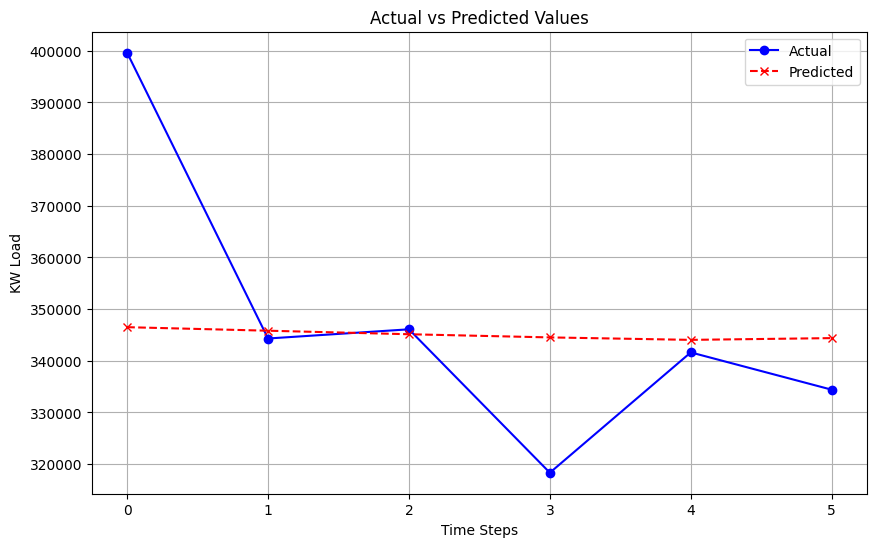

In [377]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label="Actual", color="blue", marker="o")
plt.plot(predicted_values, label="Predicted", color="red", linestyle="--", marker="x")

plt.xlabel("Time Steps")
plt.ylabel("KW Load")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [378]:
# import matplotlib.pyplot as plt

# # Assuming you have the predictions from the test set
# # predicted_values = model(X_test_tensor).detach().numpy() # if using model prediction
# predicted_values = y_pred
# actual_values = y_test_np

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(actual_values, label="Actual", color="b", marker="o", linestyle="-")
# plt.plot(predicted_values, label="Predicted", color="r", marker="x", linestyle="--")

# # Adding titles and labels
# plt.title("Actual vs Predicted Values")
# plt.xlabel("Time Steps")
# plt.ylabel("KW Load")

# # Adding legend
# plt.legend()

# # Show the plot
# plt.grid(True)
# plt.show()